In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


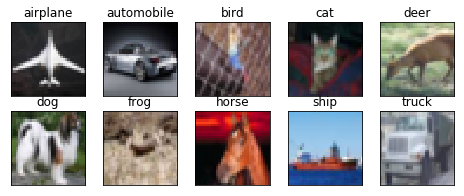

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [18]:
#base model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 23s 59ms/step - loss: 1.8837 - acc: 0.2717 - val_loss: 1.4433 - val_acc: 0.4634
Epoch 2/100
390/390 [==============================] - 21s 53ms/step - loss: 1.4015 - acc: 0.4888 - val_loss: 1.1601 - val_acc: 0.5731
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1684 - acc: 0.5851 - val_loss: 1.0043 - val_acc: 0.6390
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 1.0249 - acc: 0.6411 - val_loss: 0.9163 - val_acc: 0.6778
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9210 - acc: 0.6800 - val_loss: 0.8032 - val_acc: 0.7224
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8453 - acc: 0.7081 - val_loss: 0.8467 - val_acc: 0.7142
Epoch 7/100
390/390 [==============================] - 20s 52ms/step - loss: 0.8049 - acc: 0.7236 - val_loss: 0.7757 - val_acc: 0.7347
Epoch 8/100
390/390 [==============================] - 

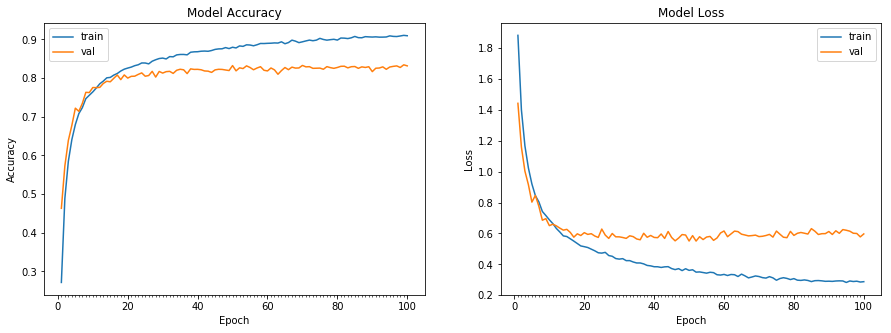

Accuracy on test data is: 83.18


In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

###redefined model


In [33]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu')) #30x30
model.add(BatchNormalization())

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))  #28x28
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2)))#15x15

model.add(Convolution2D(128, 3, 3, border_mode='same'))  #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Convolution2D(128, 3, 3, border_mode='same')) #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) #5x5


model.add(Convolution2D(128, 3, 3, border_mode='same')) #15x15
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2, 2))) #8x8

model.add(Convolution2D(64, 3, 3))  #5x5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3))  #3x3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))  #1x3
model.add(Activation('relu'))


model.add(Convolution2D(10, 1,1))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Activation('softmax'))

print(num_classes)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
/usr/local/lib

10


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 30, 64)        0         
__________

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 43s 110ms/step - loss: 1.5176 - acc: 0.4575 - val_loss: 1.2734 - val_acc: 0.5482
Epoch 2/100
390/390 [==============================] - 40s 103ms/step - loss: 0.9685 - acc: 0.6576 - val_loss: 1.6118 - val_acc: 0.5129
Epoch 3/100
390/390 [==============================] - 40s 101ms/step - loss: 0.7725 - acc: 0.7296 - val_loss: 1.0849 - val_acc: 0.6498
Epoch 4/100
390/390 [==============================] - 40s 102ms/step - loss: 0.6742 - acc: 0.7629 - val_loss: 1.1410 - val_acc: 0.6163
Epoch 5/100
390/390 [==============================] - 40s 103ms/step - loss: 0.5980 - acc: 0.7921 - val_loss: 0.8357 - val_acc: 0.7146
Epoch 6/100
390/390 [==============================] - 40s 102ms/step - loss: 0.5408 - acc: 0.8124 - val_loss: 0.8377 - val_acc: 0.7412
Epoch 7/100
390/390 [==============================] - 40s 103ms/step - loss: 0.4959 - acc: 0.8278 - val_loss: 0.7309 - val_acc: 0.7572
Epoch 8/100
390/390 [===========================

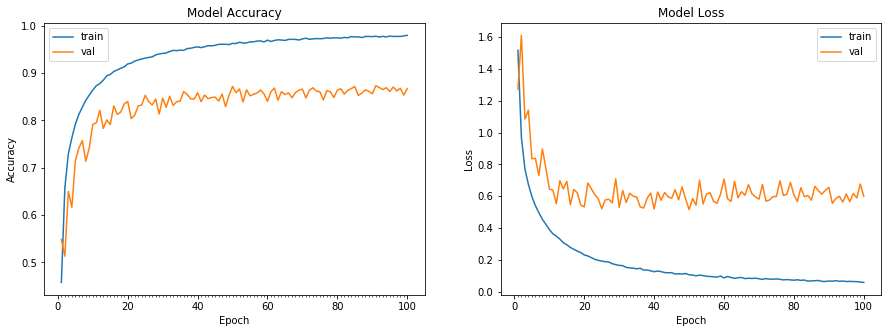

Accuracy on test data is: 86.70


In [24]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import drive

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

checkpoint = ModelCheckpoint(root_path+'model_assignment_7.best-accuracy.hdfs', save_best_only=True,monitor='val_acc')
callback_list=[checkpoint]

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callback_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



### Model accuracy is 88.13% in the 97th epoch which is higher than the base accuracy.

In [0]:
from keras.models import load_model

root_path = 'gdrive/My Drive/Colab_Models/'
model = load_model(root_path+'model_assignment_7.best-accuracy.hdfs')

from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys


pred = model.predict(test_features[:10])
class_idx = np.argmax(pred[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("activation_14")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([test_features[:10]])

    

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 64)        0         
__________

In [91]:

print(conv_layer_output_value, (conv_layer_output_value[0]))

for i in range(3):
    conv_layer_output_value[i] *= pooled_grads_value

[[[ 0.          0.          0.         ...  0.          0.
    6.15596   ]
  [ 0.          0.          0.         ...  0.          0.
    5.6476693 ]
  [ 0.          0.          0.         ...  0.          0.
    8.822007  ]
  [ 0.          0.          0.         ...  0.          0.
   14.612063  ]
  [ 0.          0.86393046  9.222732   ...  0.          0.
   12.90364   ]]

 [[ 0.          0.          0.         ...  4.035817    0.
   16.974388  ]
  [ 0.          0.          0.         ...  0.          0.
    5.0961156 ]
  [ 0.         13.072353    0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.         15.714122
    0.        ]
  [ 0.          0.          0.         ...  0.         31.604803
   14.854371  ]]

 [[ 0.          8.381775    0.         ...  0.         10.935848
   17.30247   ]
  [ 0.          9.22317     0.         ...  0.          0.
    1.6534257 ]
  [ 0.         26.008652    1.2241759  ...  0.          0.
    0.        ]
  [

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

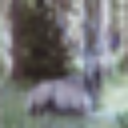

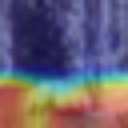

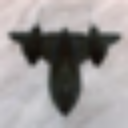

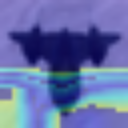

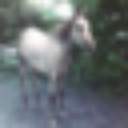

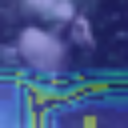

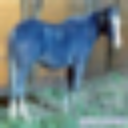

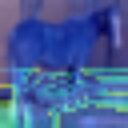

In [93]:
from google.colab.patches import cv2_imshow

(Train_features, Train_labels), (Test_features, Test_labels) = cifar10.load_data()
imgs = []
#for i in range(0,200,66):
#  imgs.append(Test_features[i])
imgs = [Test_features[314], Test_features[315], Test_features[316], Test_features[317]]
  
for img in imgs:
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype('float32'), 0.6, heatmap.astype('float32'), 0.4, 0)
  img = cv2.resize(img, (128, 128))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img, (128,128))
  cv2_imshow(superimposed_img)

#print("\n\n")



In [96]:
!wget https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
from random_eraser import get_random_eraser



--2019-06-30 14:24:25--  https://raw.githubusercontent.com/yu4u/cutout-random-erasing/master/random_eraser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888 [text/plain]
Saving to: ‘random_eraser.py.3’

random_eraser.py.3  100%[===================>]     888  --.-KB/s    in 0s      

2019-06-30 14:24:25 (121 MB/s) - ‘random_eraser.py.3’ saved [888/888]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Epoch 1/100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  


390/390 [==============================] - 49s 125ms/step - loss: 0.0348 - acc: 0.9880 - val_loss: 0.7016 - val_acc: 0.8618
Epoch 2/100
390/390 [==============================] - 41s 106ms/step - loss: 0.0373 - acc: 0.9870 - val_loss: 0.6426 - val_acc: 0.8695
Epoch 3/100
390/390 [==============================] - 42s 107ms/step - loss: 0.0401 - acc: 0.9861 - val_loss: 0.6283 - val_acc: 0.8708
Epoch 4/100
390/390 [==============================] - 41s 106ms/step - loss: 0.0388 - acc: 0.9864 - val_loss: 0.6603 - val_acc: 0.8689
Epoch 5/100
390/390 [==============================] - 42s 107ms/step - loss: 0.0347 - acc: 0.9881 - val_loss: 0.6402 - val_acc: 0.8727
Epoch 6/100
390/390 [==============================] - 42s 107ms/step - loss: 0.0358 - acc: 0.9874 - val_loss: 0.6317 - val_acc: 0.8753
Epoch 7/100
390/390 [==============================] - 41s 106ms/step - loss: 0.0357 - acc: 0.9879 - val_loss: 0.6953 - val_acc: 0.8603
Epoch 8/100
390/390 [==============================] - 41s 1

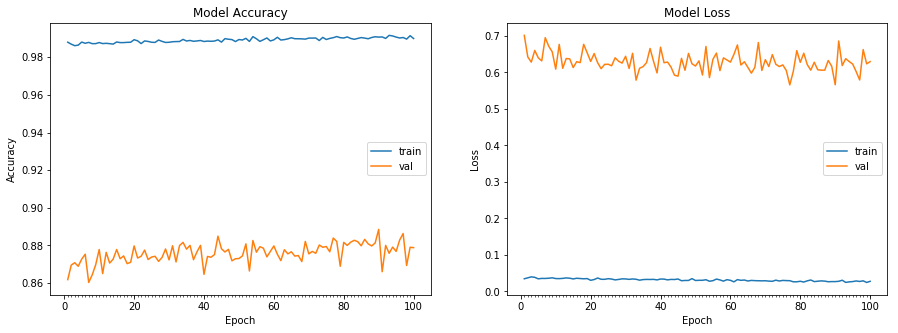

Accuracy on test data is: 87.88


In [99]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
drive.mount('/content/gdrive')

root_path = 'gdrive/My Drive/Colab_Models/'

checkpoint = ModelCheckpoint(root_path+'model_assignment_7_b.best-accuracy.hdfs', save_best_only=True,monitor='val_acc')
callback_list=[checkpoint]

start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks = callback_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))
         

In [100]:
model = load_model(root_path+'model_assignment_7_b.best-accuracy.hdfs')
pred = model.predict(test_features[:10])
class_idx = np.argmax(pred[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("activation_15")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([test_features[:10]])


print(conv_layer_output_value, (conv_layer_output_value[0]))

for i in range(3):
    conv_layer_output_value[i] *= pooled_grads_value
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)


[[[1.75735245e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   6.72820389e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
   1.28722172e+01 4.17167544e-01 1.96095908e+00 7.82853746e+00
   0.00000000e+00 0.00000000e+00 6.71561098e+00 9.20536137e+00
   5.62177992e+00 2.07807350e+01 5.16662121e+00 1.55607104e+00
   6.80430555e+00 2.92078571e+01 5.25408220e+00 6.09858036e+00
   8.98752785e+00 1.59291344e+01 2.09734478e+01 0.00000000e+00
   0.00000000e+00 0.00000000e+00 3.27500582e+00 0.00000000e+00
   0.00000000e+00 5.81770945e+00 0.00000000e+00 2.18206387e+01
   0.00000000e+00 0.00000000e+00 6.38694000e+00 0.00000000e+00
   0.00000000e+00 0.00000000e+00 2.10377579e+01 0.00000000e+00
   2.19939365e+01 1.38680363e+01 1.26401873e+01 0.00000000e+00
   0.00000000e+00 0.00000000e+00 2.46625900e+00 0.00000000e+00
   1.93806000e+01 0.00000000e+00 2.98566294e+00 6.12480164e+00
   0.00000000e+00 2.13879375e+01 0.00000000e+00 3.50935020e+01
   2.68482804e+00 1.12566948e+01 1.28005295e+01 0.00000

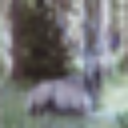

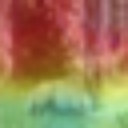

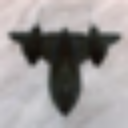

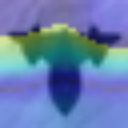

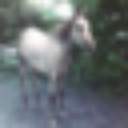

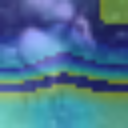

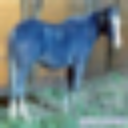

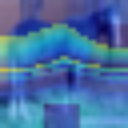

In [101]:
(Train_features, Train_labels), (Test_features, Test_labels) = cifar10.load_data()
imgs = []
for i in range(0,200,66):
  imgs.append(Test_features[i])
imgs = [Test_features[314], Test_features[315], Test_features[316], Test_features[317]]
  
for img in imgs:
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img.astype('float32'), 0.6, heatmap.astype('float32'), 0.4, 0)
  img = cv2.resize(img, (128, 128))
  cv2_imshow(img)
  superimposed_img = cv2.resize(superimposed_img, (128,128))
  cv2_imshow(superimposed_img)

#print("\n\n")

